In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML

In [2]:
%matplotlib inline
rc('figure', figsize=(11.0, 9.0)) # easy way to re-size a figure
rc('animation', html='html5')

## Coin flip example

We have to flip 5 coins to get heads or tails. We want to report back the total number of heads and the total number of tails. We want to know whether our experiment matches our prediction.

How do we do this? Define **`heads = 1`** and **`tails = 0`**. Now we can talk to the computer. Now what?

*Google:* `random uniform 0 1 integers python`

Google tells me to use **`np.random.randint`**. Let us try that:

In [3]:
draw = np.random.randint(2, size=5) # Google suggested this
heads_count = len(draw[np.where(draw == 1)])
tails_count = len(draw[(np.where(draw == 0))])
print(heads_count, tails_count) # Does the answer make sense?

3 2


So we have flipped a set of 5 coins once and we count heads and tails. Can we infer the probability of getting 0 heads from flipping 5 coins? How about 5 heads? How about 1,2,3 or 4 heads? What do we need to do?

Add a for loop and flip the set of 5 coins 10 times:

In [4]:
for i in range(0,10):
    draw = np.random.randint(2, size=5)
    heads_count = len(draw[(np.where(draw == 1))])
    tails_count = len(draw[(np.where(draw == 0))])
    print(heads_count, tails_count)

1 4
2 3
2 3
3 2
2 3
3 2
3 2
0 5
4 1
3 2


Now, how many 0s? 1s? 2s? 3s? 4s? 5s? Make this easier.....

In [5]:
counts = np.zeros(6)
print(counts)
for i in range(0,10):
    draw = np.random.randint(2, size=5)
    heads_count = len(draw[(np.where(draw == 1))])
    tails_count = len(draw[(np.where(draw == 0))])
    counts[heads_count] = counts[heads_count] + 1
    print(counts)

[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.]
[ 0.  0.  1.  1.  0.  0.]
[ 0.  0.  1.  1.  1.  0.]
[ 0.  0.  1.  2.  1.  0.]
[ 0.  0.  1.  3.  1.  0.]
[ 0.  0.  2.  3.  1.  0.]
[ 0.  0.  3.  3.  1.  0.]
[ 0.  0.  4.  3.  1.  0.]
[ 0.  1.  4.  3.  1.  0.]
[ 0.  1.  4.  4.  1.  0.]


We need **a lot** more flips of the set of 5 coins. Try 100.

[ 0.  0.  0.  0.  0.  0.]
[ 0.  0.  0.  1.  0.  0.]
[ 0.  0.  0.  2.  0.  0.]
[ 0.  0.  1.  2.  0.  0.]
[ 0.  0.  1.  3.  0.  0.]
[ 1.  0.  1.  3.  0.  0.]
[ 1.  0.  1.  4.  0.  0.]
[ 1.  0.  2.  4.  0.  0.]
[ 1.  0.  3.  4.  0.  0.]
[ 1.  0.  4.  4.  0.  0.]
[ 1.  1.  4.  4.  0.  0.]
[ 1.  1.  4.  5.  0.  0.]
[ 1.  1.  5.  5.  0.  0.]
[ 1.  2.  5.  5.  0.  0.]
[ 1.  2.  5.  6.  0.  0.]
[ 1.  2.  5.  7.  0.  0.]
[ 1.  2.  6.  7.  0.  0.]
[ 1.  2.  6.  8.  0.  0.]
[ 1.  2.  7.  8.  0.  0.]
[ 1.  2.  7.  9.  0.  0.]
[  1.   2.   7.  10.   0.   0.]
[  1.   2.   7.  11.   0.   0.]
[  1.   2.   7.  11.   0.   1.]
[  1.   2.   8.  11.   0.   1.]
[  1.   2.   8.  12.   0.   1.]
[  2.   2.   8.  12.   0.   1.]
[  2.   2.   9.  12.   0.   1.]
[  2.   2.  10.  12.   0.   1.]
[  2.   2.  11.  12.   0.   1.]
[  2.   2.  12.  12.   0.   1.]
[  2.   2.  13.  12.   0.   1.]
[  2.   2.  13.  13.   0.   1.]
[  2.   2.  13.  14.   0.   1.]
[  2.   2.  13.  14.   1.   1.]
[  2.   2.  13.  14.   2.   1.]


<Container object of 6 artists>

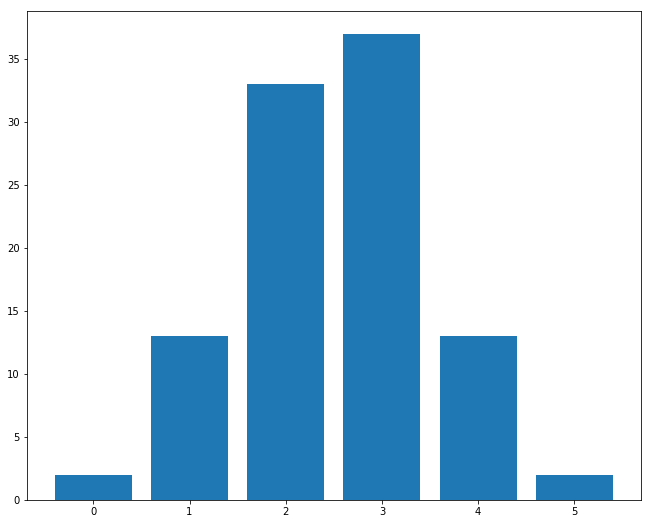

In [6]:
counts = np.zeros(6)
print(counts)
for i in range(0,100):
        draw = np.random.randint(2, size=5)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
        print (counts)
plt.bar(np.arange(6), counts)

## The Binomial Theorem 

Now, over plot a theory curve, which is a representation of the binomial series for p=0.5 (general binomial distribution is slightly different!):
$P(x=n) = \frac{N!}{n!(N-n)!}p^N$

What is $n$? $N$? 

$N$ is the total number of coins being flipped.
$n$ is the number of heads you observe.

In [7]:
from scipy.misc import factorial
def PNx(N):
    p = 0.5
    x = (np.arange(N+1))
    PNx = factorial(N)/((factorial(x)*factorial(N-x)))*((0.5)**N)
    return PNx
print(PNx(5))

[ 0.03125  0.15625  0.3125   0.3125   0.15625  0.03125]


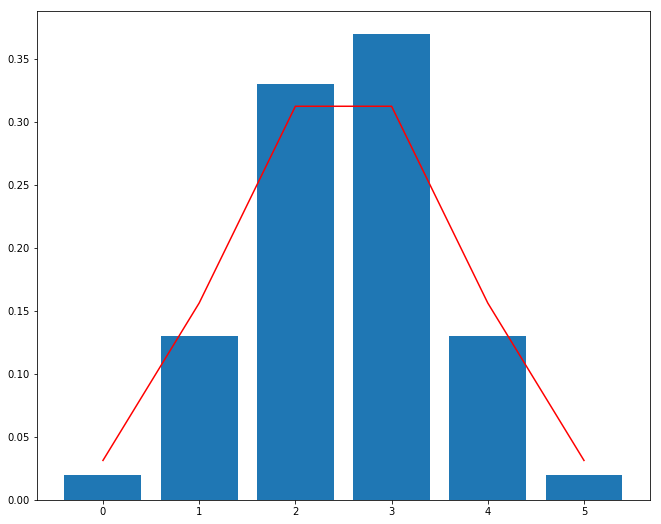

In [10]:
plt.bar(np.arange(6), counts/100.0)
plt.plot(np.arange(6), PNx(5), color = 'red')

What did we learn? 

1. How to make an "experiment" in an iPython Notebook (i.e., on a computer).  <font color="crimson">This exercise was a computer simulation!</font>

2. Analytic statistical theory makes sense in the limit of large $N$.  <font color ="crimson"> What do we do when N is small?</font>

How about we have a little fun and make a movie, this time flipping 10 coins. Our story is to watch as the observed binomial theory converges on the theoretical binomial theorem. How many frames do we need (where each frame includes an additional role of the 10 coins) before life imitates "theory"?

*Note: The following cell may take around a minute to compute*

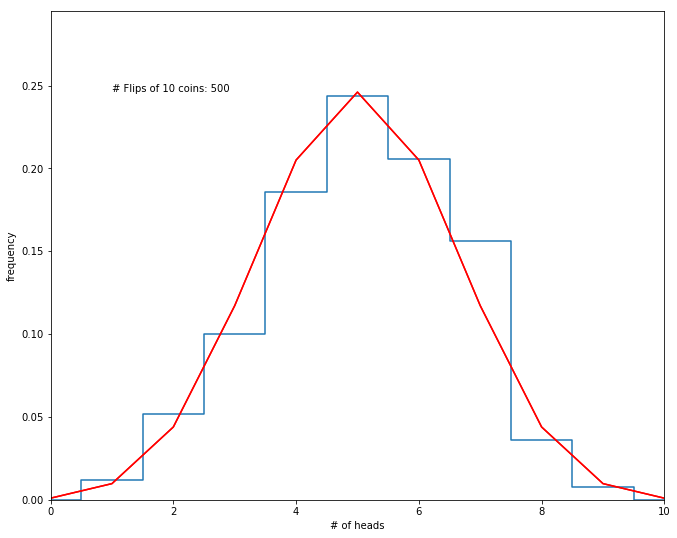

In [9]:
N_coins = 10

# First set up the figure, the axis, and the plot element we want to animate
PN_mid = max(PNx(N_coins))
fig = plt.figure()
ax = plt.axes(xlim=(0, N_coins), ylim=(0, PN_mid*1.2))
line, = ax.plot(np.arange(N_coins+1), np.zeros(N_coins+1), drawstyle="steps-mid")

# initialization function: plot the background of each frame
def init():
    plt.plot(np.arange(N_coins+1), PNx(N_coins), color="red")
    line.set_data(np.arange(N_coins+1), np.zeros(N_coins+1))
    plt.xlabel("# of heads")
    plt.ylabel("frequency")
    return line,

# animation function.  This is called sequentially
def count_fun(i):
    flips_per_frame = 5
    counts = np.zeros(N_coins+1)
    j = (i+1)*flips_per_frame
    for k in range(j):
        draw = np.random.randint(2, size=N_coins)
        heads_count = len(draw[(np.where(draw == 1))])
        tails_count = len(draw[(np.where(draw == 0))])
        counts[heads_count] = counts[heads_count] + 1
    x = np.linspace(0, N_coins, N_coins+1)
    y = counts/j
    line.set_data(x, y)
    ax.annotate("# Flips of {} coins: {}".format(N_coins, j),
                xy=(2, PN_mid), xytext=(1, PN_mid), backgroundcolor='w')
    return line,

# call the animator.  blit=True means only re-draw the parts that have changed.
anim = animation.FuncAnimation(fig, count_fun, init_func=init,
                               frames=100, interval=200, blit=True)

anim